In [9]:
import pandas as pd
df = pd.read_csv("Hist1_interactions.csv")

In [10]:
df.head()

,name,variable,value
0,chr13:23880000-23910000,chr13:24240000-24270000,0.942272
1,chr13:23880000-23910000,chr13:24210000-24240000,0.929070
2,chr13:23100000-23130000,chr13:23160000-23190000,0.863976
3,chr13:22320000-22350000,chr13:22350000-22380000,0.857857
4,chr13:22830000-22860000,chr13:22920000-22950000,0.856384


In [3]:
df2 = pd.read_csv("Hist1_regions.csv",index_col=0)

In [4]:
df2.head()

,H3K36me3.ES-Bruce4.ENCFF299BTW,H3K27ac.ES-E14.ENCFF194TQD,DNase.ES-E14.ENCFF167GZG,CTCF.ES-Bruce4.ENCFF926DQD,DNase.ZHBTc4-mESC.ENCFF082FXK,ZC3H11A.ES-E14.ENCFF024QSW,chen2008-ZFX.fimo,EP300.ES-Bruce4.ENCFF350GCX,DNase.ES-E14.ENCFF911LAE,DNase.ES-E14.ENCFF797POV,...,chen2008-NMYC.fimo,H3K9me3.ES-Bruce4.ENCFF834MWI,chen2008-NANOG.fimo,DNase.WW6.ENCFF651VVB,chen2008-SMAD1.fimo,DNase.ZHBTc4-mESC.ENCFF485JVJ,DNase.WW6.ENCFF994GNO,DNase.WW6.ENCFF227YIF,DNase.ES-E14.ENCFF809UQX,DNase.WW6.ENCFF038FMN
chr13:21630000-21660000,0,0,0,0,0,0,1,0,0,0,...,0,0,9,0,10,0,0,0,0,0
chr13:21690000-21720000,0,0,1,0,0,0,2,0,0,0,...,0,0,25,0,27,0,0,0,1,0
chr13:22140000-22170000,0,0,5,1,3,0,1,2,1,3,...,3,1,18,1,20,3,1,2,4,3
chr13:22260000-22290000,0,0,0,0,0,0,5,0,2,1,...,4,8,17,4,22,0,2,0,0,2
chr13:22320000-22350000,0,0,0,0,0,0,2,0,0,0,...,2,0,15,0,23,0,0,0,0,0


In [5]:
import seaborn as sns
%matplotlib inline

In [11]:
sns.color_palette()

[(0.0, 0.0, 1.0),
 (0.0, 0.5, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.75, 0.75),
 (0.75, 0, 0.75),
 (0.75, 0.75, 0),
 (0.0, 0.0, 0.0)]

In [39]:
def virtue_4C(locus,df,c,names):
#     return a dataframe with all names and color
    white = (1.0,1.0,1.0)
    temp1 = pd.DataFrame()
    temp1['name'] = names
    temp1['color'] = [white]*len(names)
    temp1.set_index('name',inplace=True)
    for row in df.index:
        r1 = df.at[row,'name']
        r2 = df.at[row,'variable']
        if r1 == locus or r2 == locus:
            temp1.at[r1,'color'] = c
            temp1.at[r2,'color'] = c


    temp1.at[locus,'color'] = white
    return temp1

In [40]:
c1 = virtue_4C("chr13:23880000-23910000",df,(0.0, 0.0, 1.0),df2.index.tolist())
c2 = virtue_4C("chr13:22650000-22680000",df,(1.0, 0.0, 0.0),df2.index.tolist())
c3 = virtue_4C("chr13:23130000-23160000",df,(0.0, 1.0, 0.0),df2.index.tolist())

In [41]:
df_c = pd.concat([c1,c2,c3],axis=1)

In [42]:
df_c.columns = ["2388",'2265','2313']

,colors
name,
chr13:21630000-21660000,"(1.0, 1.0, 1.0)"
chr13:21690000-21720000,"(1.0, 1.0, 1.0)"
chr13:22140000-22170000,"(1.0, 1.0, 1.0)"
chr13:22260000-22290000,"(1.0, 1.0, 1.0)"
chr13:22320000-22350000,"(1.0, 1.0, 1.0)"


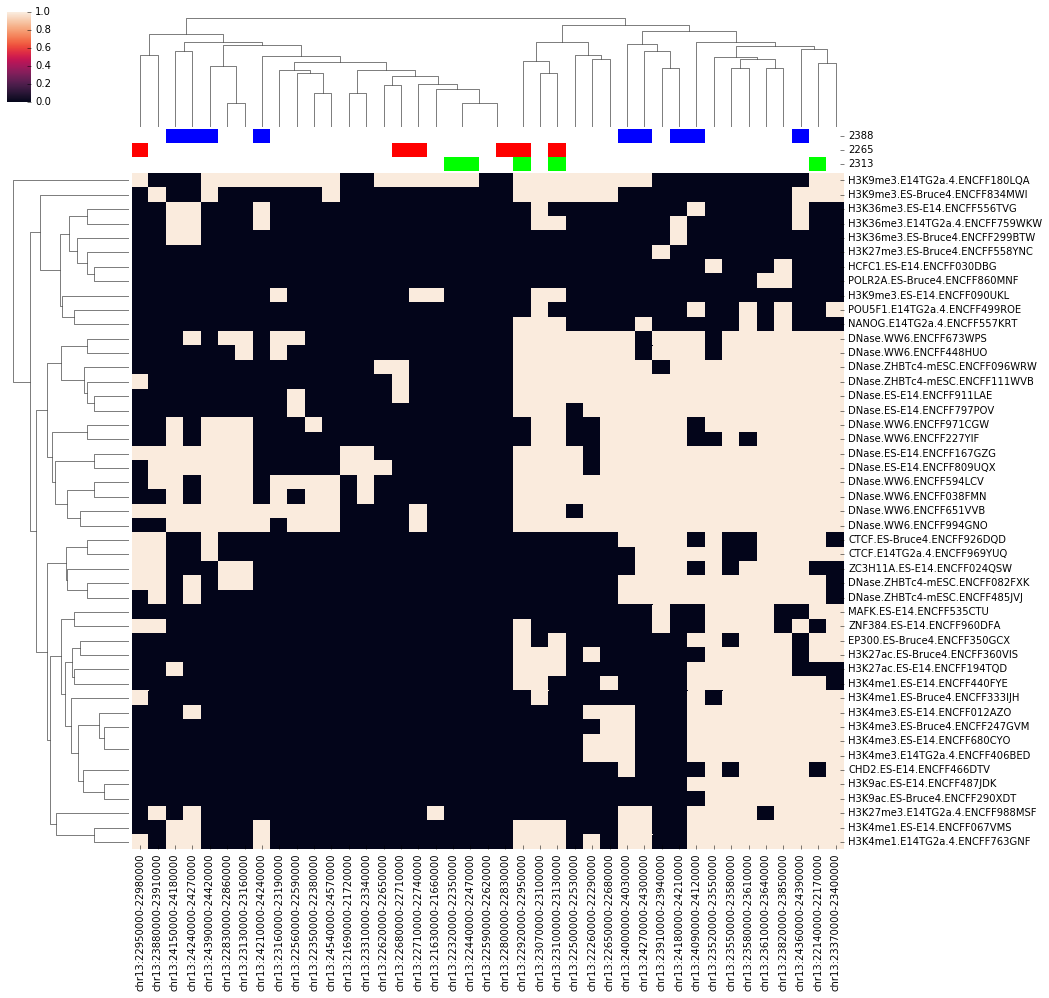

In [50]:
df3=df2>=1
my_used_columns = []
for c in df3.columns:
    if not "chen2008" in c:
        my_used_columns.append(c)
    df3[c] = df3[c].astype(int)
sns.clustermap(df3[my_used_columns].transpose(),method="weighted",figsize=(15,15),col_colors = df_c)

In [7]:
df3.head()

,H3K36me3.ES-Bruce4.ENCFF299BTW,H3K27ac.ES-E14.ENCFF194TQD,DNase.ES-E14.ENCFF167GZG,CTCF.ES-Bruce4.ENCFF926DQD,DNase.ZHBTc4-mESC.ENCFF082FXK,ZC3H11A.ES-E14.ENCFF024QSW,chen2008-ZFX.fimo,EP300.ES-Bruce4.ENCFF350GCX,DNase.ES-E14.ENCFF911LAE,DNase.ES-E14.ENCFF797POV,...,chen2008-NMYC.fimo,H3K9me3.ES-Bruce4.ENCFF834MWI,chen2008-NANOG.fimo,DNase.WW6.ENCFF651VVB,chen2008-SMAD1.fimo,DNase.ZHBTc4-mESC.ENCFF485JVJ,DNase.WW6.ENCFF994GNO,DNase.WW6.ENCFF227YIF,DNase.ES-E14.ENCFF809UQX,DNase.WW6.ENCFF038FMN
chr13:21630000-21660000,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
chr13:21690000-21720000,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
chr13:22140000-22170000,False,False,True,False,True,False,False,True,False,True,...,True,False,True,False,True,True,False,True,True,True
chr13:22260000-22290000,False,False,False,False,False,False,True,False,True,False,...,True,True,True,True,True,False,True,False,False,True
chr13:22320000-22350000,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,True,False,False,False,False,False
